In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\RGIPT\Documents\Classification\DATASET_ weka_679.csv")

In [3]:
df['SSA(m2/g)'] = df['SSA(m2/g)']/1000

In [4]:
df.head()

,SSA(m2/g),Pore size(nm),Pore Volume (cm3/g),Potential,Nitrogen %,Id/Ig,Specific Capacitance
0,0.63,1.50,0.0,0.25,0.0,0.0,80.0
1,1.00,1.75,0.0,0.25,0.0,0.0,125.0
2,1.50,2.50,0.0,0.25,0.0,0.0,175.0
3,1.40,2.90,0.0,0.25,0.0,0.0,160.0
4,0.85,1.25,0.0,0.25,0.0,0.0,95.0


In [5]:
df = df.rename(columns={'SSA(m2/g)': 'SSA','Pore size(nm)': 'PS', 'Pore Volume (cm3/g)': 'PV' , 'Nitrogen %':'NC' ,  'Specific Capacitance':'SC'})

In [6]:
df.head()

,SSA,PS,PV,Potential,NC,Id/Ig,SC
0,0.63,1.50,0.0,0.25,0.0,0.0,80.0
1,1.00,1.75,0.0,0.25,0.0,0.0,125.0
2,1.50,2.50,0.0,0.25,0.0,0.0,175.0
3,1.40,2.90,0.0,0.25,0.0,0.0,160.0
4,0.85,1.25,0.0,0.25,0.0,0.0,95.0


In [7]:
df.describe()

,SSA,PS,PV,Potential,NC,Id/Ig,SC
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,1.166802,1.714821,0.867994,1.296057,1.329385,0.555733,188.130824
std,0.883202,2.616503,0.861877,0.792527,2.875535,0.798127,104.478231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.461500,0.000000,0.238000,1.000000,0.000000,0.000000,120.000000
50%,1.016700,0.900000,0.690000,1.000000,0.000000,0.000000,176.500000
75%,1.641000,2.522500,1.295000,1.000000,1.137500,0.997500,247.750000
max,4.073000,27.200000,5.910000,4.000000,19.800000,4.540000,587.000000


In [8]:
# To select all columns except the last one for X1, and the last column for y1:
X = df.iloc[:, :-1]  # Select all columns except the last one for features (X1)
y = df.iloc[:, -1]   # Select the last column as the target (y1)

In [9]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split, learning_curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train

,SSA,PS,PV,Potential,NC,Id/Ig
182,0.477,1.96,0.230,1.0,0.00,1.01
89,0.000,0.00,0.000,0.8,0.00,1.12
185,2.086,2.10,1.100,1.0,0.00,0.00
148,1.578,0.00,1.092,1.2,0.68,0.00
204,0.521,0.00,0.380,1.0,7.30,1.00
...,...,...,...,...,...,...
71,3.110,0.70,1.680,1.0,0.00,0.00
106,0.787,5.81,1.140,1.0,0.00,0.00
270,1.588,0.00,1.010,0.9,5.30,0.84
435,1.417,2.22,1.560,1.0,1.99,1.01


In [11]:
#Scaler technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [14]:
from sklearn.ensemble import RandomForestRegressor
# Initialize and train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X, y)

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [15]:
# Get feature importance scores
feature_importances = rf_model.feature_importances_

Feature Importance Scores:
     Feature  Importance
0        SSA    0.412312
3  Potential    0.211210
4         NC    0.198642
1         PS    0.080296
2         PV    0.055669
5      Id/Ig    0.041871


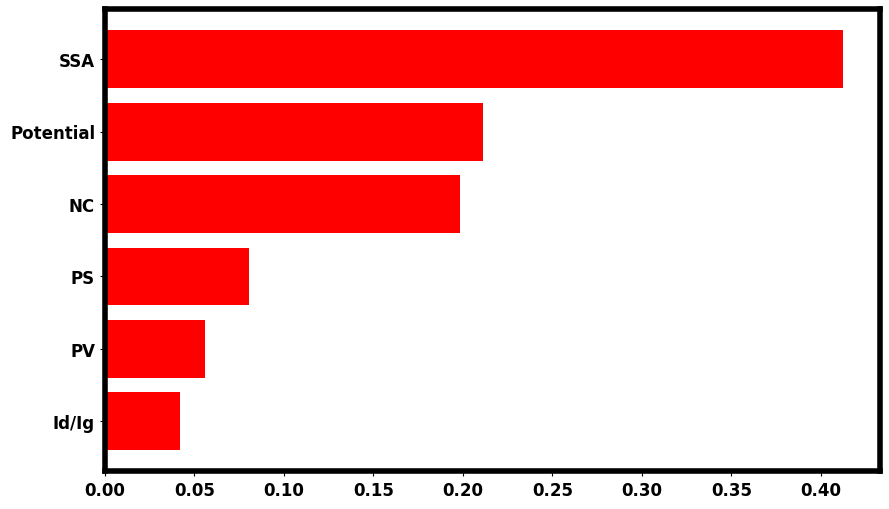

In [16]:

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importance scores
print("Feature Importance Scores:")
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='red')
#plt.xlabel('Feature Importance Score')
#plt.ylabel('Features')
#plt.title('Random Forest Feature importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top


#Make x-axis and y-axis numbers bold
plt.xticks(fontsize=12, fontweight='bold')  # Bold x-axis numbers
plt.yticks(fontsize=12, fontweight='bold')  # Bold y-axis numbers

# Making the title and labels bold

#plt.xlabel("Importance score", fontweight="bold", fontsize=18)  # Bold x-axis label
#plt.ylabel("Features", fontweight="bold", fontsize=18)  # Bold y-axis label


# Bold black outline for the figure
plt.gca().spines["top"].set_linewidth(4)   # Top border
plt.gca().spines["right"].set_linewidth(4) # Right border
plt.gca().spines["bottom"].set_linewidth(4) # Bottom border
plt.gca().spines["left"].set_linewidth(4)  # Left border

plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.show()

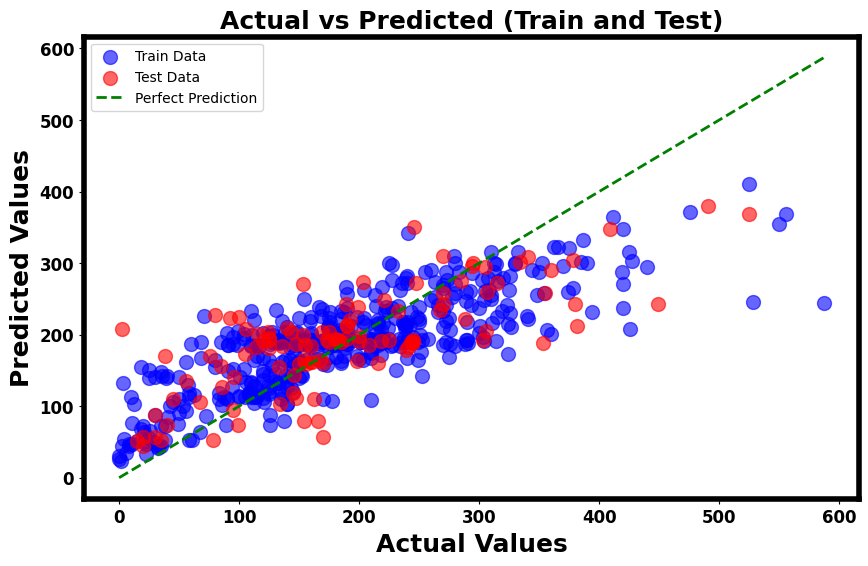

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv(r"C:\Users\RGIPT\Documents\Classification\DATASET_ weka_679.csv")
# Example dataset (assuming you have 6 input features and 1 output feature)


# Assuming you have 6 input features (X) and 1 output feature (y)
X = df.iloc[:, :-1].values  # Input features (6 columns)
y = df.iloc[:, -1].values   # Output feature (1 column)

# Split the dataset into training (70%) and testing (30%) sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train1, y_train1)

# Make predictions on both train and test data
y_train_pred = rf.predict(X_train1)
y_test_pred = rf.predict(X_test1)

# Plot actual vs predicted values for training and testing data
plt.figure(figsize=(10, 6))

# Plot for training data
plt.scatter(y_train1, y_train_pred, color='blue', s=100, label='Train Data', alpha=0.6)

# Plot for testing data
plt.scatter(y_test1, y_test_pred, color='red', s=100, label='Test Data', alpha=0.6)

# Plot a perfect prediction line
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='green', linewidth=2, linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel("Actual Values", fontweight="bold", fontsize=18)  # Bold x-axis label
plt.ylabel("Predicted Values", fontweight="bold", fontsize=18)  # Bold y-axis label
plt.title("Actual vs Predicted (Train and Test)", fontweight="bold", fontsize=18)
plt.legend()

#Make x-axis and y-axis numbers bold
plt.xticks(fontsize=12, fontweight='bold')  # Bold x-axis numbers
plt.yticks(fontsize=12, fontweight='bold')  # Bold y-axis numbers



# Bold black outline for the figure
plt.gca().spines["top"].set_linewidth(4)   # Top border
plt.gca().spines["right"].set_linewidth(4) # Right border
plt.gca().spines["bottom"].set_linewidth(4) # Bottom border
plt.gca().spines["left"].set_linewidth(4)  # Left border

plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.show()

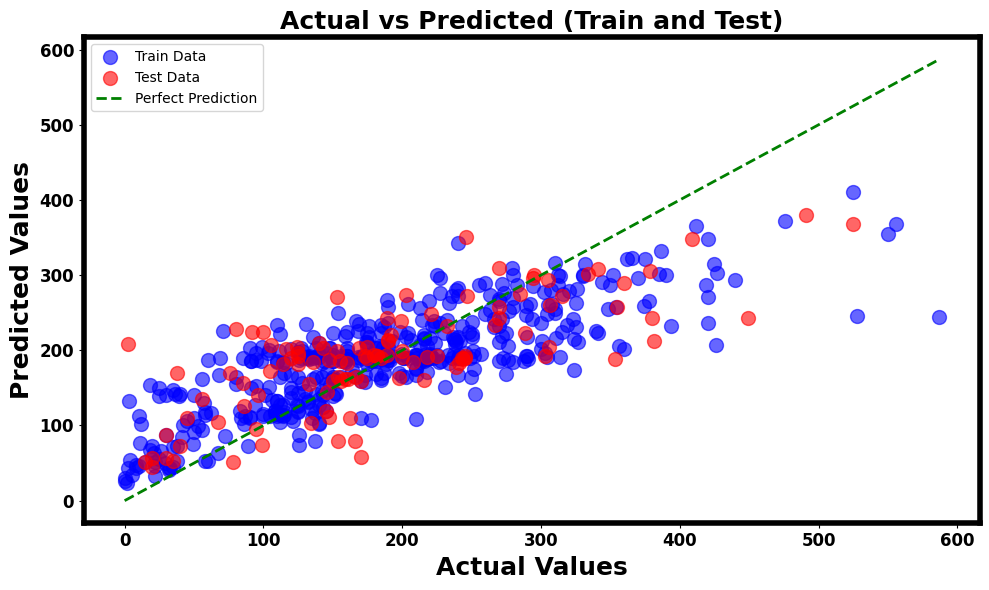

In [19]:
import mplcursors
# Plot actual vs predicted values for training and testing data
plt.figure(figsize=(10, 6))

# Plot for training data
plt.scatter(y_train1, y_train_pred, color='blue', s=100, label='Train Data', alpha=0.6)

# Plot for testing data
plt.scatter(y_test1, y_test_pred, color='red', s=100, label='Test Data', alpha=0.6)

# Plot a perfect prediction line
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='green', linewidth=2, linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel("Actual Values", fontweight="bold", fontsize=18)  # Bold x-axis label
plt.ylabel("Predicted Values", fontweight="bold", fontsize=18)  # Bold y-axis label
plt.title("Actual vs Predicted (Train and Test)", fontweight="bold", fontsize=18)
plt.legend()

#Make x-axis and y-axis numbers bold
plt.xticks(fontsize=12, fontweight='bold')  # Bold x-axis numbers
plt.yticks(fontsize=12, fontweight='bold')  # Bold y-axis numbers



# Bold black outline for the figure
plt.gca().spines["top"].set_linewidth(4)   # Top border
plt.gca().spines["right"].set_linewidth(4) # Right border
plt.gca().spines["bottom"].set_linewidth(4) # Bottom border
plt.gca().spines["left"].set_linewidth(4)  # Left border

plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["left"].set_color("black")

# Add pop-up tooltips
cursor = mplcursors.cursor(highlight=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(
    f"Actual: {sel.target[0]:.2f}\nPredicted: {sel.target[1]:.2f}"
))

plt.tight_layout()
plt.show()